In [7]:
#Import libraries
import os
import urllib
import datetime 
import zipfile
import pandas as pd
import numpy as np

In [8]:
#  Variables para descarga de datos
desaparecidos_RNPDNO_url = "http://www.datamx.io/dataset/fdd2ca20-ee70-4a31-9bdf-823f3c1307a2/resource/d352810c-a22e-4d72-bb3b-33c742c799dd/download/desaparecidos3ago.zip"
desaparecidos_RNPDNO_archivo = "desaparecidosRNPDNO.zip"
desaparecidos_corte_nacional_url = "http://www.datamx.io/dataset/fdd2ca20-ee70-4a31-9bdf-823f3c1307a2/resource/4865e244-cf59-4d39-b863-96ed7f45cc70/download/nacional.json"
desaparecidos_corte_nacional_archivo = "desaparecidos_nacional.json"
subdir = "./data/"
#http://datamx.io/dataset/fdd2ca20-ee70-4a31-9bdf-823f3c1307a2/resource/d352810c-a22e-4d72-bb3b-33c742c799dd/download/desaparecidos3ago.zip

In [9]:
#guardar archivo en carpeta data y archivo _info
if not os.path.exists(desaparecidos_RNPDNO_archivo):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    urllib.request.urlretrieve(desaparecidos_RNPDNO_url, subdir + desaparecidos_RNPDNO_archivo)  
    with zipfile.ZipFile(subdir + desaparecidos_RNPDNO_archivo, "r") as zip_ref:
        zip_ref.extractall(subdir)
    
    urllib.request.urlretrieve(desaparecidos_corte_nacional_url, subdir + desaparecidos_corte_nacional_archivo)  

    with open(subdir + "info.txt", 'w') as f:
        f.write("Archivos sobre personas desaparecidas\n")
        info = """
        Datos de desaparecidos, corte nacional y desagregación a nivel estatal, por edad, por sexo, 
        por nacionalidad, por año de desaparición y por mes de desaparición para los últimos 12 meses.

        Los datos se obtuvieron del RNPDNO con fecha de 03 de agosto de 2021 (la base de datos se actualiza constantemente) 

        """ 
        f.write(info + '\n')
        f.write("Descargado el " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
        f.write("Desde: " + desaparecidos_RNPDNO_url + "\n")
        f.write("Nombre: " + desaparecidos_RNPDNO_archivo + "\n")
        f.write("Agregados nacionales descargados desde: " + desaparecidos_corte_nacional_url + "\n")
        f.write("Nombre: " + desaparecidos_corte_nacional_archivo + "\n")

In [10]:
#leer json to dataframe

desaparecidos = pd.read_json(desaparecidos_corte_nacional_url)


In [11]:
#Mostrar columnas
desaparecidos.columns

Index(['totales', 'espacial', 'anual', 'mensual_ultimo_anio', 'por_edad',
       'por_nacionalidad'],
      dtype='object')

In [12]:
#verificar contenido pasando a numpy array
desaparecidos.to_numpy()

array([[40.61, nan, nan, nan, nan, nan],
       [59.39, nan, nan, nan, nan, nan],
       [93.39, nan, nan, nan, nan, nan],
       [6.61, nan, nan, nan, nan, nan],
       [90.57, nan, nan, nan, nan, nan],
       [9.43, nan, nan, nan, nan, nan],
       [90223.0, nan, nan, nan, nan, nan],
       [222181.0, nan, nan, nan, nan, nan],
       [131958.0, nan, nan, nan, nan, nan],
       [123230.0, nan, nan, nan, nan, nan],
       [8728.0, nan, nan, nan, nan, nan],
       [81716.0, nan, nan, nan, nan, nan],
       [8507.0, nan, nan, nan, nan, nan],
       [nan,
        {'AGUASCALIENTES': 1848, 'BAJA CALIFORNIA': 2065, 'BAJA CALIFORNIA SUR': 583, 'CAMPECHE': 243, 'CHIAPAS': 1344, 'CHIHUAHUA': 8012, 'CIUDAD DE MEXICO': 5629, 'COAHUILA': 2964, 'COLIMA': 2047, 'DURANGO': 1611, 'ESTADO DE MEXICO': 18082, 'GUANAJUATO': 7121, 'GUERRERO': 3663, 'HIDALGO': 1266, 'JALISCO': 15849, 'MICHOACAN ': 4665, 'MORELOS': 1557, 'NAYARIT': 1221, 'NUEVO LEON': 5616, 'OAXACA': 1465, 'PUEBLA': 4338, 'QUERETARO ': 1135,

In [13]:
#Accesar la informacion por estado en la seccion espacial
from pandas.io.json import json_normalize
dict = pd.json_normalize(desaparecidos['espacial'])


In [14]:
chartdes = desaparecidos.iloc[13:16]['espacial']
chartdes.head()


Hombre           {'AGUASCALIENTES': 1848, 'BAJA CALIFORNIA': 20...
Indeterminado    {'AGUASCALIENTES': 3, 'BAJA CALIFORNIA': 5, 'B...
Mujer            {'AGUASCALIENTES': 2537, 'BAJA CALIFORNIA': 19...
Name: espacial, dtype: object

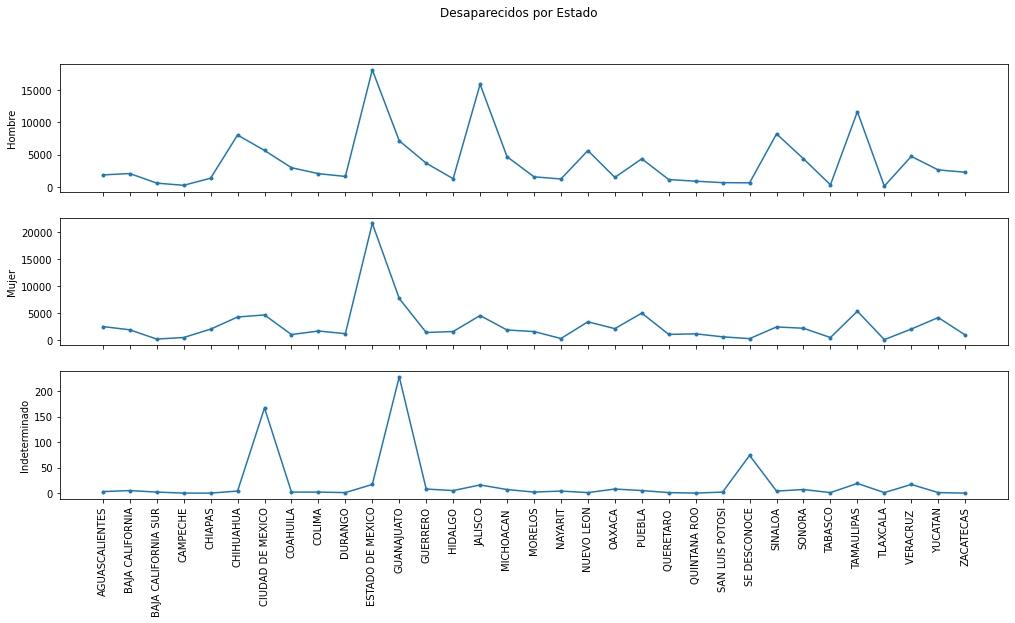

In [15]:
#Graficar con matplotlib x = estados y = casos desaparecidos por sexo
import matplotlib.pyplot as plt
x = chartdes.loc['Hombre'].keys()
y1 = chartdes.loc['Hombre'].values()
y2 = chartdes.loc['Mujer'].values()
y3 = chartdes.loc['Indeterminado'].values()

N = len(x)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize =(17,8), sharex = True)
fig.suptitle ('Desaparecidos por Estado')
plt.xticks(rotation=90)

ax1.plot(x,y1,'.-')
ax1.set_ylabel('Hombre')


ax2.plot(x,y2,'.-')
ax2.set_ylabel('Mujer')

ax3.plot(x,y3,'.-')
ax3.set_ylabel('Indeterminado')

plt.show()


## Archivos XML

In [22]:
#Ejemplo 1
import xml.etree.ElementTree as et #import libraries

archivo_url = "https://github.com/mcd-unison/ing-caract/raw/main/ejemplos/integracion/ejemplos/ejemplo.xml"
archivo_nombre = "ejemplito.xml"
subdir = "./data/"

if not os.path.exists(subdir + archivo_nombre):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    urllib.request.urlretrieve(archivo_url, subdir + archivo_nombre)


desayunos = et.parse(subdir + archivo_nombre)
des_root = desayunos.getroot()

#for (i, des) in enumerate(desayunos.getroot()):
 #   print("Opción {}:".format(i+1))
  #  for prop in des:
   #     print("\t{}: {}".format(prop.tag, prop.text.strip()))

#print("Los desayunos disponibles son: " + 
 #     ", ".join([p.text for p in desayunos.findall("food/name")]))


In [21]:
des_root.attrib
#for elm in des_root.findall("./name"):
 #   print (elm.attrib)

{}

In [23]:
# ¿Como se podría poner esta información en un DataFrame de `pandas`?
# Agreguen tanto código como consideren necesario.
df_cols = ["name","price","calories","description"]
rows = []

for (i, des) in enumerate(desayunos.getroot()):
    for prop in des:
        de_name = des.attrib.get("name")
        de_price = des.attrib.get("price")
        de_calories = des.attrib.get("calories")
        de_descr = des.attrib.get("description")

    rows.append({"name": de_name, "price": de_price, 
                 "calories": de_calories, "description": de_descr})

out_df = pd.DataFrame(rows, columns = df_cols)



In [24]:
out_df

,name,price,calories,description
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [25]:
#
import xml.etree.ElementTree as et # import library
poets_url = "https://github.com/mcd-unison/ing-caract/raw/main/ejemplos/integracion/ejemplos/wikipedia-poetas.xml"
archiv_poetsx = "poetas.xml"
subdir = "./data/"

if not os.path.exists(subdir + archiv_poetsx):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    urllib.request.urlretrieve(poets_url, subdir + archiv_poetsx)


poets = et.parse(subdir + archiv_poetsx)

In [38]:
poets_root = poets.getroot() 
poets_root.attrib

{'{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'http://www.mediawiki.org/xml/export-0.10/ http://www.mediawiki.org/xml/export-0.10.xsd',
 'version': '0.10',
 '{http://www.w3.org/XML/1998/namespace}lang': 'es'}

In [33]:
for root_elem in poets_root[1].findall('title'):
    print(root_elem.attrib)